In [6]:
# !pip install pandas
# !pip install numpy
# !pip install wordcloud
# !pip install sklearn
# !pip install seaborn
# !pip install nltk

## DATA

In [7]:
#Load data-preprocessing libraries
import pandas as pd
import numpy as np

#Text processing libraries
import re
import nltk
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer #feature extraction

#Load data-visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#model building
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

#evaluation metrics
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

nltk.download('popular')
stop_words = set(stopwords.words('english')) 

lemmatizer = WordNetLemmatizer() 

pd.pandas.set_option('display.max_columns',None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#load training data
df_data = pd.read_csv('twitter_training.csv',header=None)
df_data.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
#load testing data
df_test = pd.read_csv('twitter_validation.csv',header=None)
df_test.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [10]:
#Rename Column
def rename_dataframe(df):
    df.rename(columns= {0:'Tweet_ID',1:'Topic',2:'Sentiment',3:'Tweet'},inplace=True)

In [11]:
rename_dataframe(df_data)
df_data.head()

,Tweet_ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [12]:
rename_dataframe(df_test)
df_test.head()

,Tweet_ID,Topic,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


## EDA

In [13]:
#shape of data
print('Train data shape: ',df_data.shape) 
print('Test data shape: ',df_test.shape)

Train data shape:  (74682, 4)
Test data shape:  (1000, 4)


In [14]:
#percentage of missing data
(df_data.isnull().sum()/len(df_data))*100

Tweet_ID     0.000000
Topic        0.000000
Sentiment    0.000000
Tweet        0.918561
dtype: float64

In [15]:
#Drop missing karna hanya 0.91%
df_data.dropna(axis=0,inplace=True)

In [16]:
#check percentage
(df_data.isnull().sum()/len(df_data))*100

Tweet_ID     0.0
Topic        0.0
Sentiment    0.0
Tweet        0.0
dtype: float64

In [17]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   73996 non-null  int64 
 1   Topic      73996 non-null  object
 2   Sentiment  73996 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [18]:
print('Distinct Values: \n')
col=['Topic','Sentiment']
for i in col:
    print(i,'->')
    print(df_data[i].value_counts())
    print('\n')

Distinct Values: 

Topic ->
MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Border

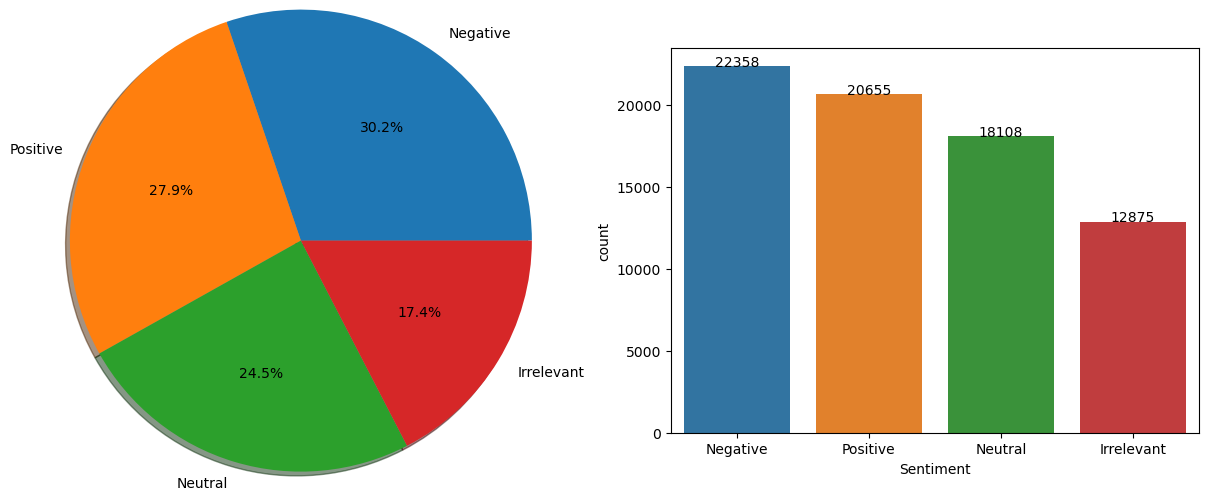

In [19]:
#Visualisasi
plt.figure(figsize=(15,5))

#plot pie chart
plt.subplot(1,2,1)
label = df_data['Sentiment'].value_counts().index
label_count = df_data['Sentiment'].value_counts().values
plt.pie(data=df_data, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1.5)

#plot countplot
plt.subplot(1,2,2)
ax = sns.countplot(x='Sentiment', data=df_data, order=label)
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

## hasil dari pencobaan pembagian kelas sentimen bernilai seimbang antara ke 4 kelas

In [20]:
#Menghitung jumlah kata tiap tweet
df_data['Tweet_word_count']=df_data['Tweet'].apply(lambda x: len(x.split()))

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

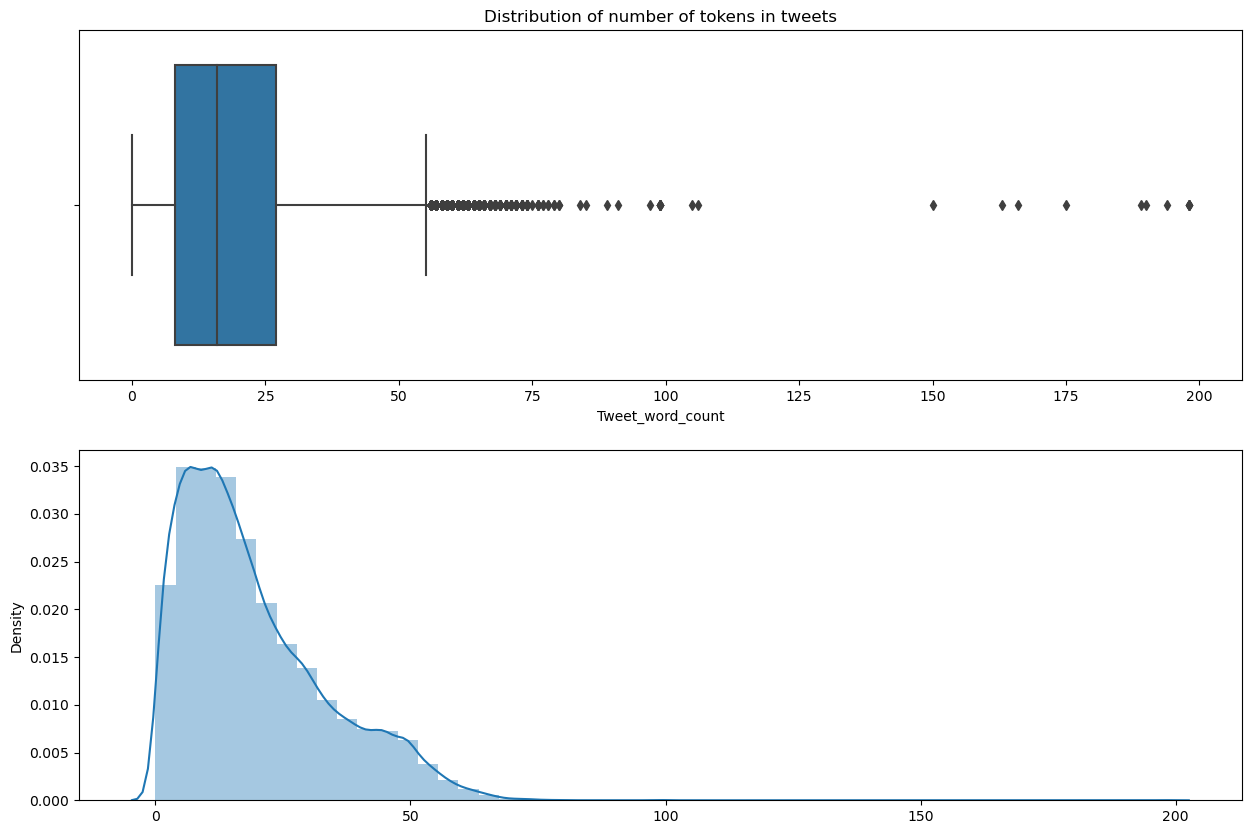

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x=df_data['Tweet_word_count'])
plt.title(('Distribution of number of tokens in tweets'))

plt.subplot(2,1,2)
sns.distplot(x=df_data['Tweet_word_count'])

In [ ]:
# rerata kata tiap tweet ada di angka 25

## Preprocessing Data Training

In [25]:
#Remove user mentions
df_data['Tweet_clean']=df_data['Tweet'].apply(lambda x: re.sub(r'@[A-Za-z0-9]+','',x))

In [26]:
#Remove hashtags
df_data['Tweet_clean']=df_data['Tweet_clean'].apply(lambda x: re.sub('#','',x))

In [27]:
# make a dictionary of contractions
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [28]:
#Remove contractions
df_data['Tweet_clean']=df_data['Tweet_clean'].apply(lambda x: ' '.join(
    [contraction_mapping[t] if t in contraction_mapping else t for t in x.split(" ")]))

In [29]:
#Remove links/urls
df_data['Tweet_clean']=df_data['Tweet_clean'].apply(lambda x: re.sub(r'http\S+','',x))

In [30]:
def txt_conversion(sentence):
    #Remove character tidak perlu
    sentence=re.sub(r'[^a-zA-Z ]','',sentence)
    #Convert ke lowercase
    sentence=sentence.lower()
    #split berdasar spasi
    words=sentence.split()
    #gabungkan untuk menjadi kalimat
    return (" ".join(words)).strip()

In [31]:
df_data['Tweet_clean']=df_data['Tweet_clean'].apply(lambda x: txt_conversion(x))

In [32]:
#Removing stop-words and convert words to lemma
def stop_wrds_lemma_convert(sentence):
    tokens = [w for w in sentence.split() if not w in stop_words] #stopwords removal
    newString=''
    for i in tokens:                                                 
        newString=newString+lemmatizer.lemmatize(i)+' '    #converting words to lemma                               
    return newString.strip()    

In [33]:
df_data['Tweet_clean']=df_data['Tweet_clean'].apply(lambda x: stop_wrds_lemma_convert(x))

In [34]:
#Removing stop-words and convert words to lemma
def stop_wrds_lemma_convert(sentence):
    tokens = [w for w in sentence.split() if not w in stop_words] #stopwords removal
    newString=''
    for i in tokens:                                                 
        newString=newString+lemmatizer.lemmatize(i)+' '    #converting words to lemma                               
    return newString.strip()   

In [35]:
df_data['Tweet_clean']=df_data['Tweet_clean'].apply(lambda x: stop_wrds_lemma_convert(x))

In [36]:
#Drop columns yang tidak perlu
df_data.drop(columns=['Tweet_ID','Tweet'],axis=0,inplace=True)

In [37]:
df_data.dropna(axis=0,how='any',inplace=True)

## Visualisasi kata Paling banyak

(-0.5, 799.5, 499.5, -0.5)

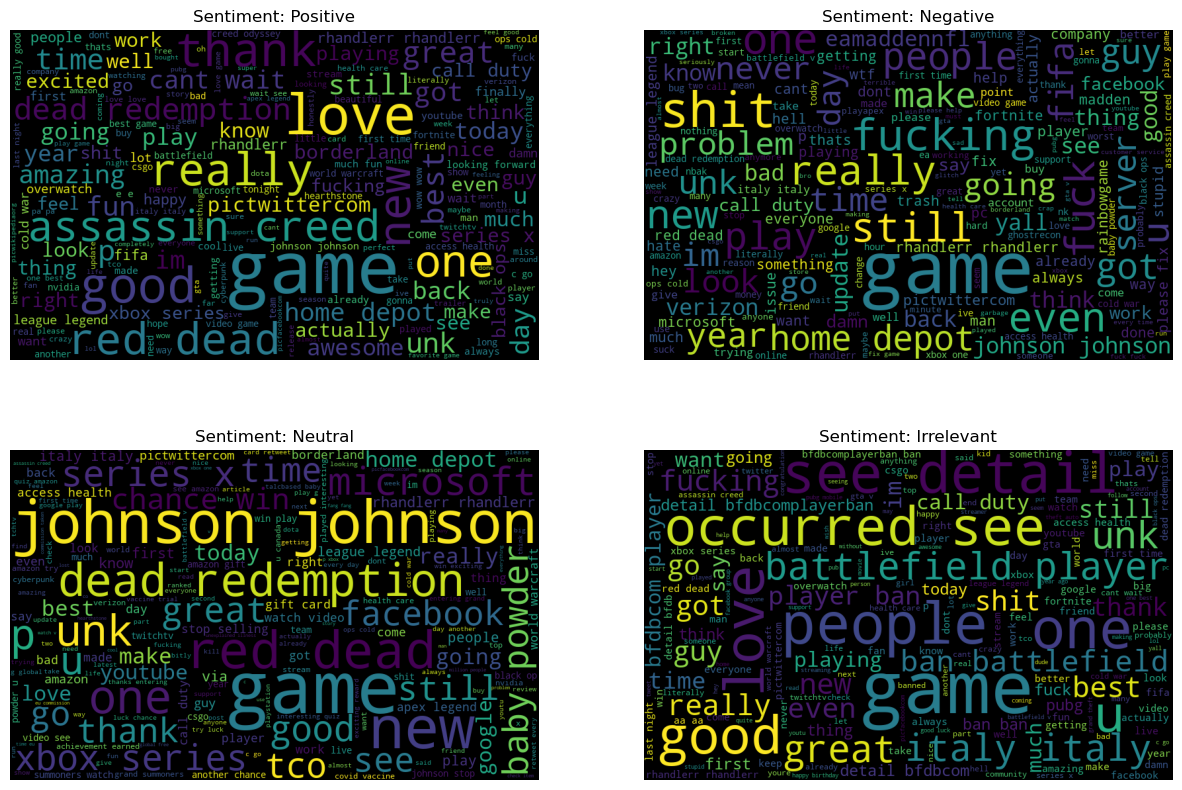

In [38]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
all_words=' '.join([text for text in df_data[df_data['Sentiment']=='Positive']['Tweet_clean']])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.title('Sentiment: Positive')
plt.imshow(wordcloud)
plt.axis('off')

plt.subplot(2,2,2)
all_words=' '.join([text for text in df_data[df_data['Sentiment']=='Negative']['Tweet_clean']])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.title('Sentiment: Negative')
plt.imshow(wordcloud)
plt.axis('off')

plt.subplot(2,2,3)
all_words=' '.join([text for text in df_data[df_data['Sentiment']=='Neutral']['Tweet_clean']])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.title('Sentiment: Neutral')
plt.imshow(wordcloud)
plt.axis('off')

plt.subplot(2,2,4)
all_words=' '.join([text for text in df_data[df_data['Sentiment']=='Irrelevant']['Tweet_clean']])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.title('Sentiment: Irrelevant')
plt.imshow(wordcloud)
plt.axis('off')

## Testing

## Naive Bayes

In [39]:
X=df_data.loc[:,df_data.columns!='Sentiment']
y=df_data['Sentiment']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_valid.shape, y_valid.shape)

Train (51797, 4) (51797,)
Test (22199, 4) (22199,)


In [63]:
#TF-IDF
vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,3),min_df=10,max_features=10000) 
#Train on train data
features_train= vectorizer.fit_transform(X_train['Tweet_clean'])
#Apply on test data
features_valid= vectorizer.transform(X_valid['Tweet_clean'])
#check shape
features_train.shape, features_valid.shape

((51797, 7666), (22199, 7666))

In [41]:
#Function to fit and apply a model
def model_apply(model):
    #train the model
    model.fit(features_train,y_train)
    #make prediksi
    pred=model.predict(features_valid)
    #model evaluasi
    print(model)
    print('Accuracy score: ',accuracy_score(pred,y_valid))
    print('Weighted F1 score: ',f1_score(y_pred=pred,y_true=y_valid,average='weighted'))
    print('Confusion Matrix: \n',confusion_matrix(pred,y_valid))

In [42]:
#Naive Bayes
nb=MultinomialNB()
model_apply(nb)

MultinomialNB()
Accuracy score:  0.6445785846209289
Weighted F1 score:  0.633822510253592
Confusion Matrix: 
 [[1495  124  225  164]
 [1003 5406 1275 1056]
 [ 445  506 2872  471]
 [ 966  608 1047 4536]]


## SVM

In [65]:
df_data['Tweet_clean'].head()

0    im getting borderland murder
1              coming border kill
2      im getting borderland kill
3     im coming borderland murder
4    im getting borderland murder
Name: Tweet_clean, dtype: object

In [66]:
word_count = df_data['Tweet_clean'].apply(lambda x: len(x.split()))

In [67]:
max_word_count = word_count.max()
max_word_count

163

In [68]:
df_data.head()

,Topic,Sentiment,Tweet_word_count,Tweet_char_count,Tweet_clean
0,Borderlands,Positive,11,43,im getting borderland murder
1,Borderlands,Positive,12,40,coming border kill
2,Borderlands,Positive,10,41,im getting borderland kill
3,Borderlands,Positive,10,42,im coming borderland murder
4,Borderlands,Positive,12,46,im getting borderland murder


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(df_data['Tweet_clean'])
test_vectors = vectorizer.transform(df_test)

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report

classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, df_data['Sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(df_test['Sentiment'], prediction_linear, output_dict=True)
print('positive: ', report['Positive'])
print('negative: ', report['Negative'])
print('neutral: ', report['Neutral'])